<a href="https://colab.research.google.com/github/jeffbgreene/geology-558/blob/main/Regression_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 style="text-align:center;"> Supervised Regession EDA - Meteorological data from the Hawaii HI-SEAS weather station </h1>**

#### Author: Jeff Greene
#### Date : 1/26/2025


The data set I am using for this module consists of meteorological data from the Hawaii HI-SEAS weather station for four months (September through December 2016) between Mission IV and Mission V that I found on Kaggle. According to their website:


> The Hawai‘i Space Exploration Analog and Simulation (HI-SEAS) is a Mars and Moon exploration analog research station, currently operated by the International MoonBase Alliance.
Located approximately 8,200 feet above sea level, the HI-SEAS habitat is a 1,200 square foot dome located on a Mars-like site on the Mauna Loa volcano on Hawai‘i Island. HI-SEAS has been the home to five successful long-duration (4 to 12 month) NASA Mars simulation missions and tens of other analog space missions in collaboration with multiple space agencies, companies, and organizations worldwide.




I will perform an investigation into this dataset to determine which features are important. The goal is to use this EDA to help build models in the next assignment that will be able accurately predict solar radiation as a numeric value given input data. The data is complete and has no missing values. This data set consists of 32,686 rows, so it is not big data.

One thing I will need to consider is how to split the data. I'm considering using the SciKit Learn `TimeSeriesSplit` for splitting the data.



In [1]:
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr


# Set the figure size
plt.rcParams["figure.figsize"] = (12,12)
# Set the default font size
plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jeffbgreene/geology-558/main/SolarPrediction.csv', index_col=None, header=0)

In [3]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
# Derive a new column called datetime
df['UNIXDateTime'] = pd.to_datetime(df['UNIXTime'], unit='s')

In [5]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,UNIXDateTime
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-30 09:55:26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-30 09:50:23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-30 09:45:26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-30 09:40:21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-30 09:35:24


In [6]:
print(f"The length of the data set is {len(df)} rows")

The length of the data set is 32686 rows


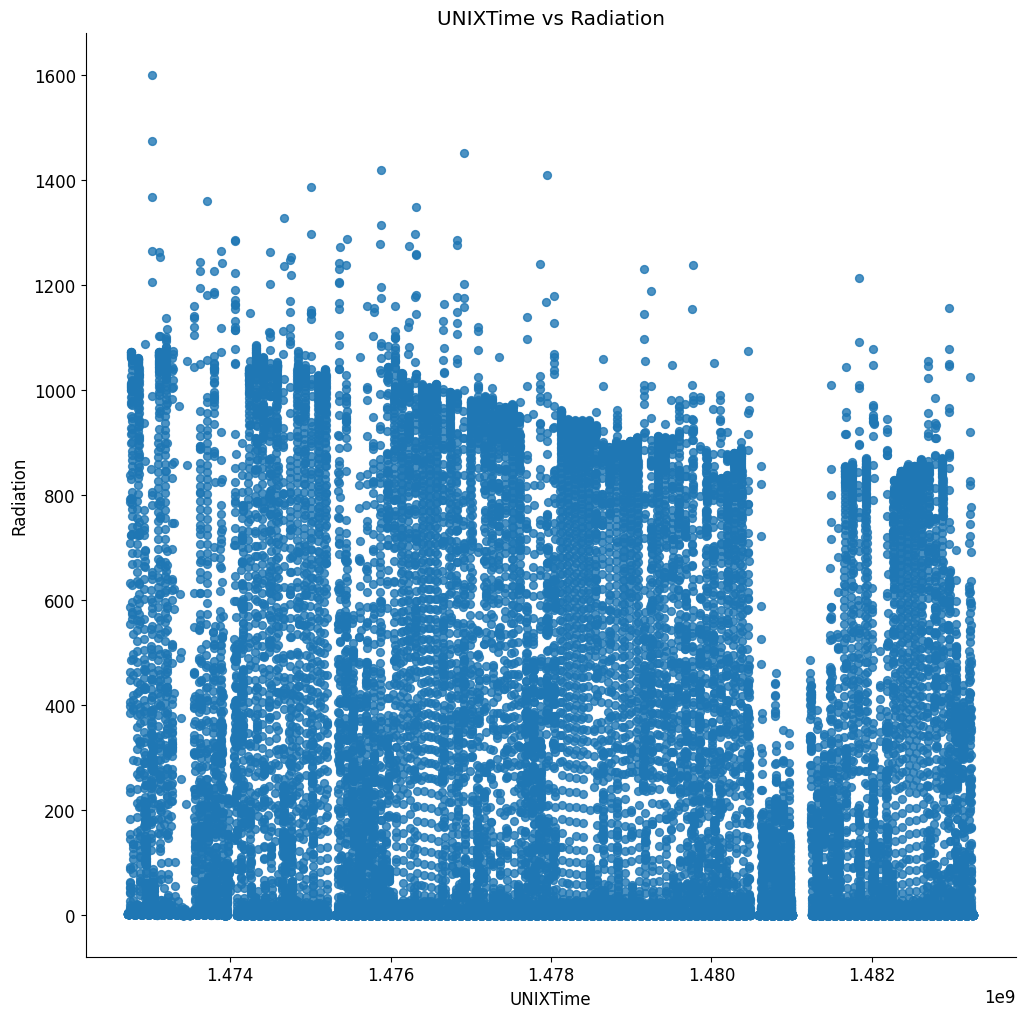

In [7]:
# @title UNIXTime vs Radiation

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='UNIXTime', y='Radiation', s=32, alpha=.8)
plt.title('UNIXTime vs Radiation')
plt.gca().spines[['top', 'right',]].set_visible(False)

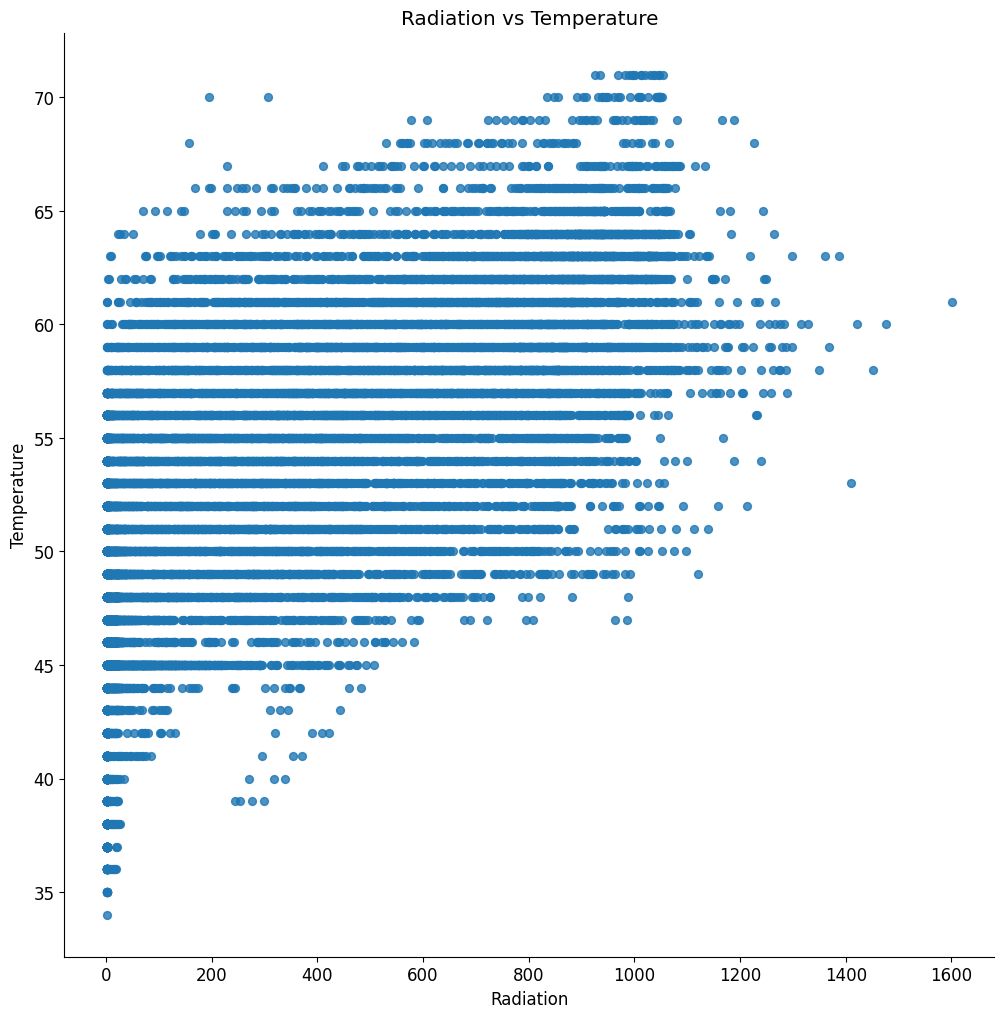

In [8]:
# @title Radiation vs Temperature

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Radiation', y='Temperature', s=32, alpha=.8)
plt.title('Radiation vs Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,UNIXDateTime
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,2016-11-02 00:41:04.944808192
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,2016-09-01 10:00:08
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,2016-10-04 02:01:37.500000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,2016-11-01 18:47:49.500000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,2016-11-30 04:28:48
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,2017-01-01 09:55:01
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UNIXTime                32686 non-null  int64         
 1   Data                    32686 non-null  object        
 2   Time                    32686 non-null  object        
 3   Radiation               32686 non-null  float64       
 4   Temperature             32686 non-null  int64         
 5   Pressure                32686 non-null  float64       
 6   Humidity                32686 non-null  int64         
 7   WindDirection(Degrees)  32686 non-null  float64       
 8   Speed                   32686 non-null  float64       
 9   TimeSunRise             32686 non-null  object        
 10  TimeSunSet              32686 non-null  object        
 11  UNIXDateTime            32686 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), ob

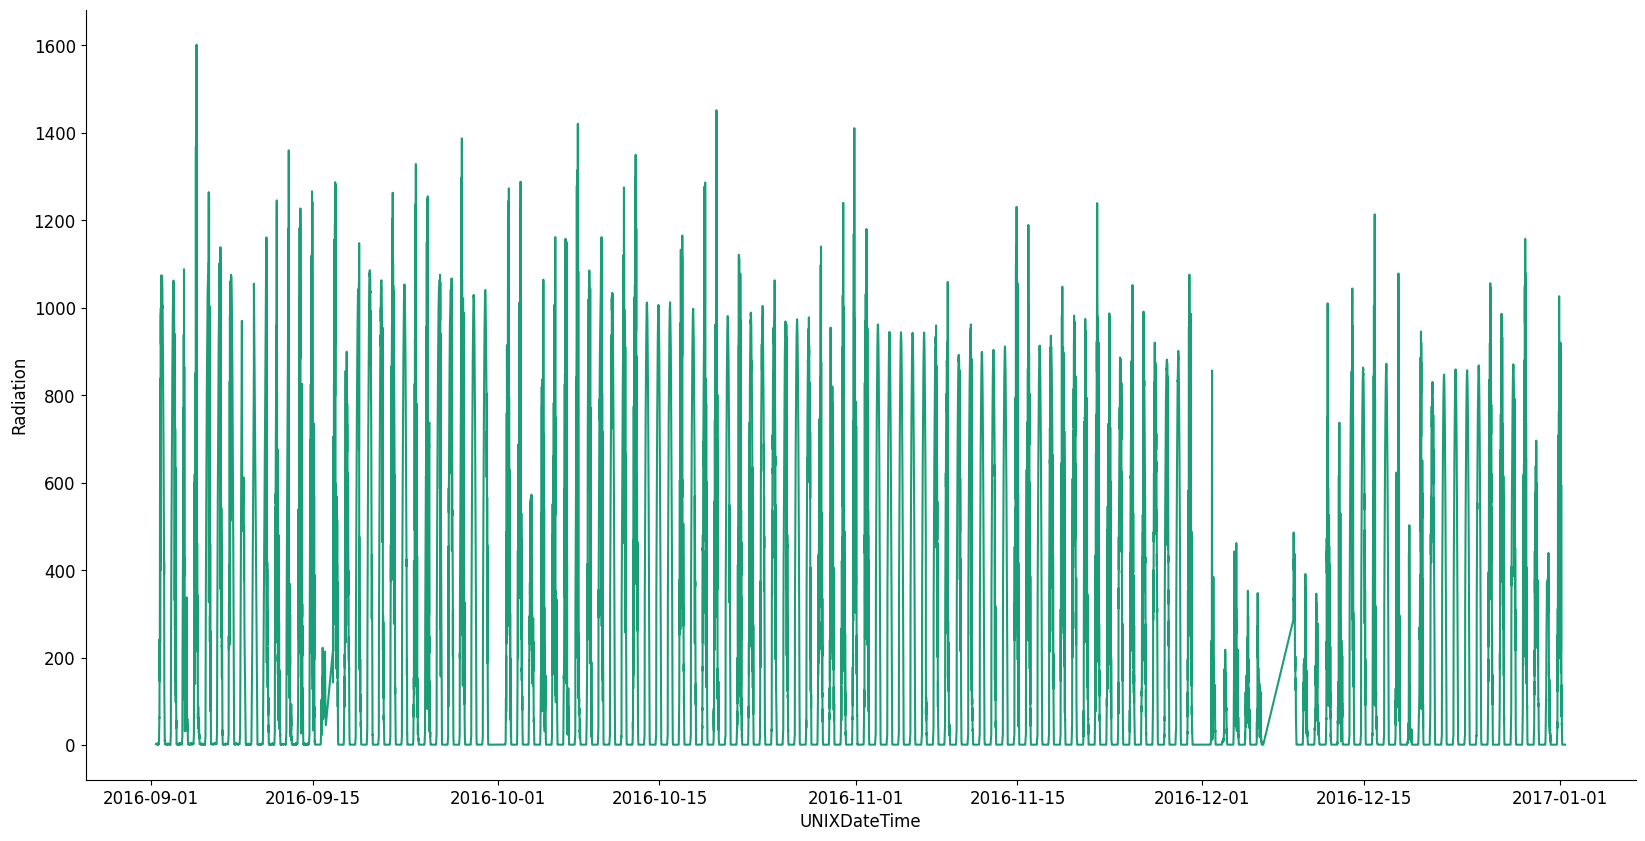

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['UNIXDateTime']
  ys = series['Radiation']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(20,10))
df_sorted = df.sort_values('UNIXDateTime', ascending=True)
_plot_series(df_sorted, '')

sns.despine(fig=fig, ax=ax)
plt.xlabel('UNIXDateTime')
_ = plt.ylabel('Radiation')

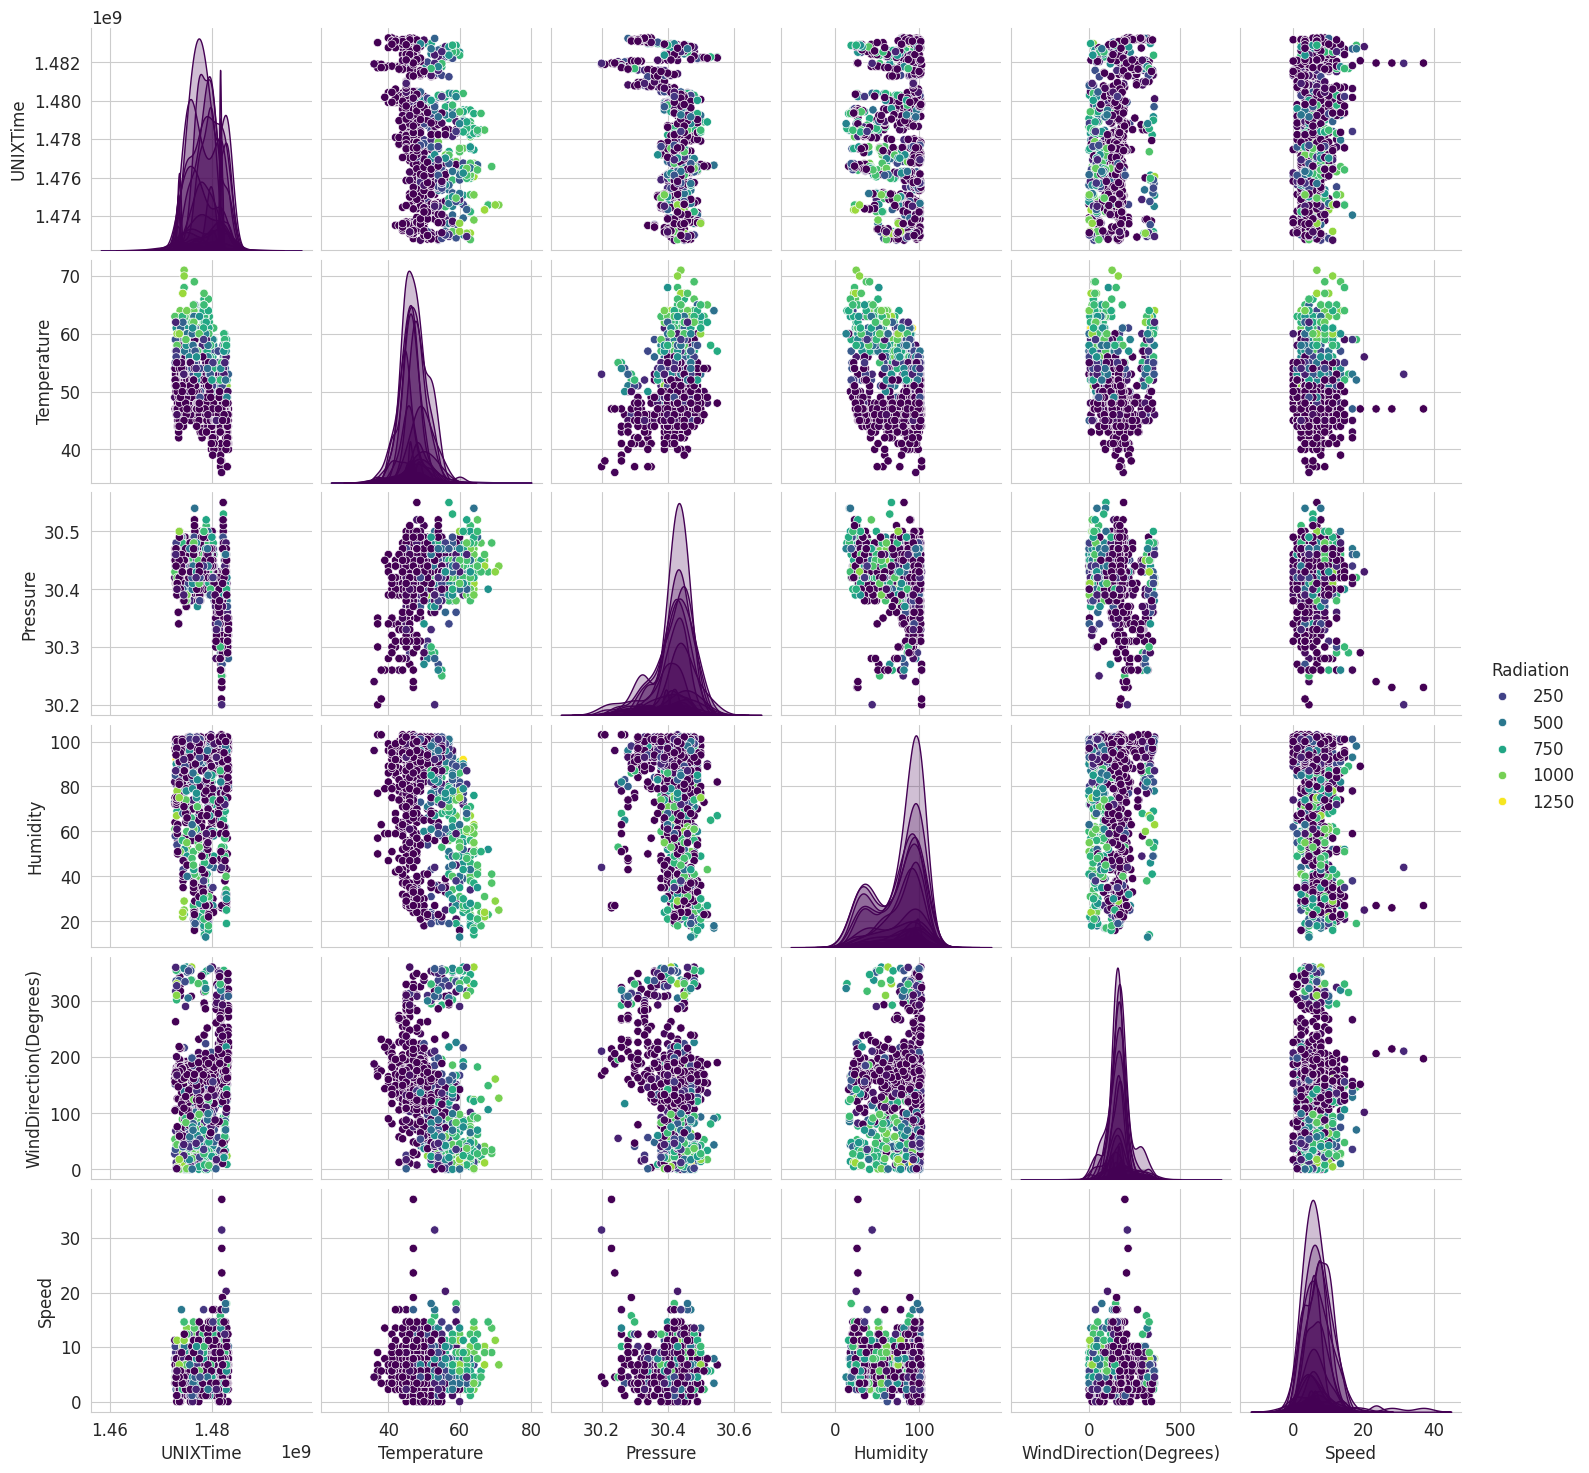

In [12]:
# Pairplots for the different features with Radiation as the
sns.set_style("whitegrid")
g = sns.pairplot(df.sample(n=1000), hue='Radiation', palette='viridis', diag_kind="kde", dropna=True)
plt.show()

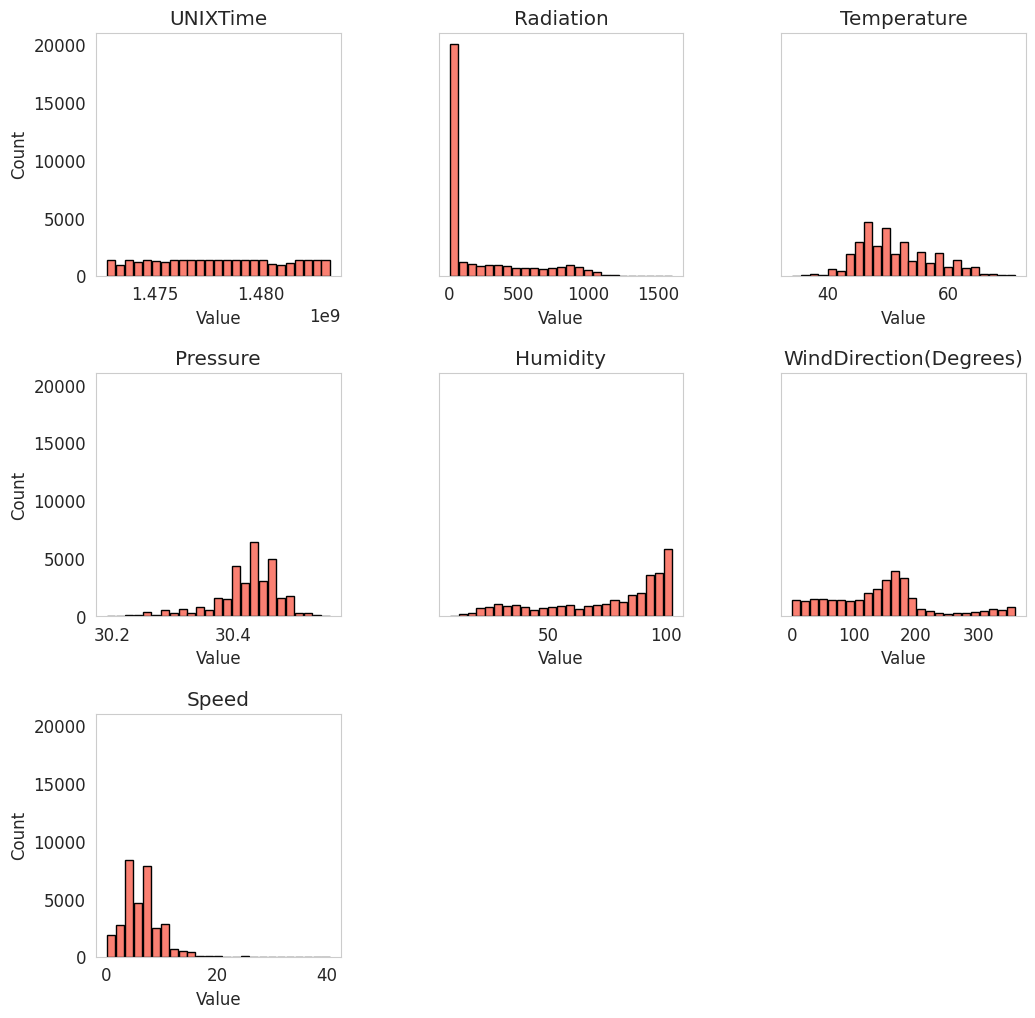

In [13]:
# Create a histogram of weight distribution counts for all samples
df_no_dates = df.drop(columns=['UNIXDateTime'])
ax = df_no_dates.hist(bins=25, grid=False, color='salmon', edgecolor='black', sharey=True, zorder=2, rwidth=0.9)
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust values as needed
# Loop through the plots and add labels to x and y axes
for chart in ax.flatten():
    chart.set_xlabel("Value")
    chart.set_ylabel("Count")


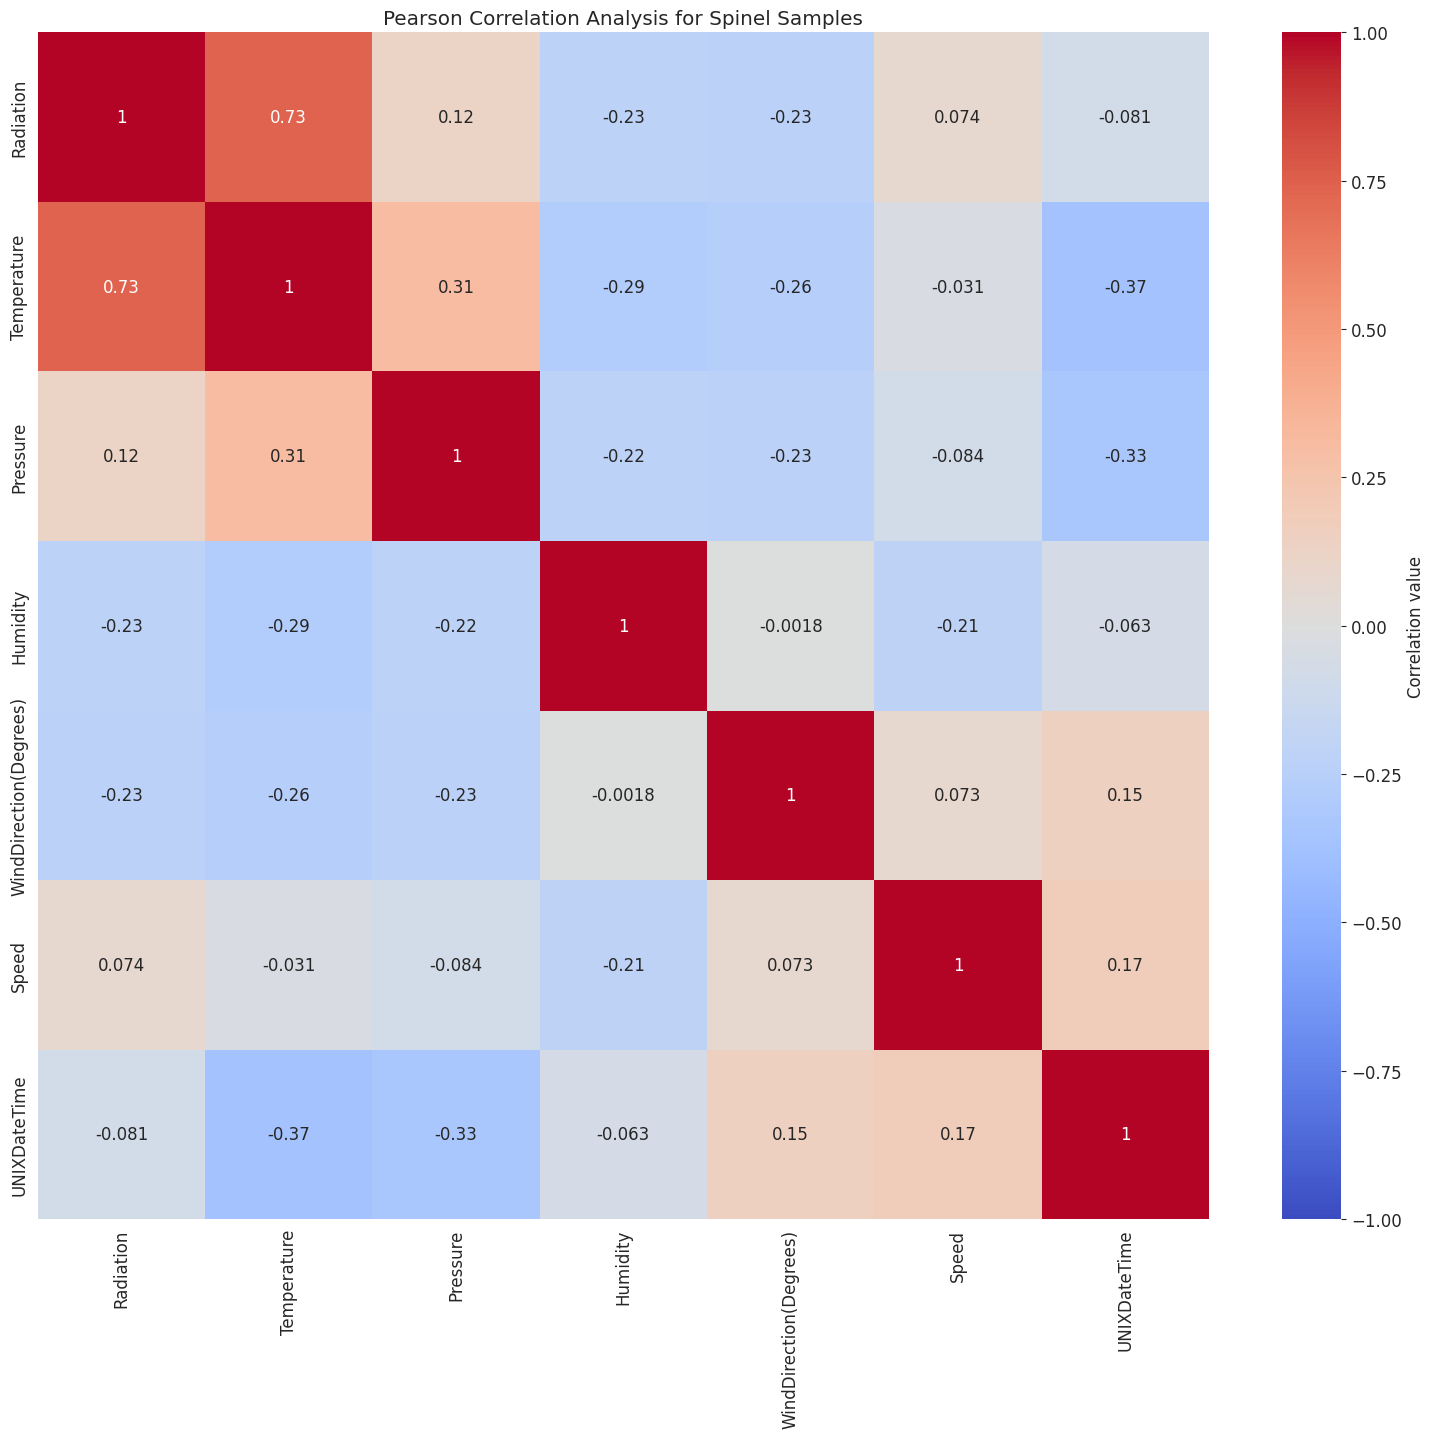

In [14]:
# Drop the Object columns
df_filtered = df.drop(columns=['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'])

fig, ax = plt.subplots(figsize=[15, 15], sharex=True)

# Calculate the correlation matrix, dropping all NaN rows and columns
correlation_matrix = df_filtered.corr(method='pearson').dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plot the results of the correlation as a heatmap
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', cbar_kws={'label': 'Correlation value'})
plt.title("Pearson Correlation Analysis for Spinel Samples")
ax.set_position([0.55, 0.1, 0.35, 0.8])  # Adjust position manually

plt.tight_layout()
plt.show()


There appears to be a high correlation between radiation and temperature.

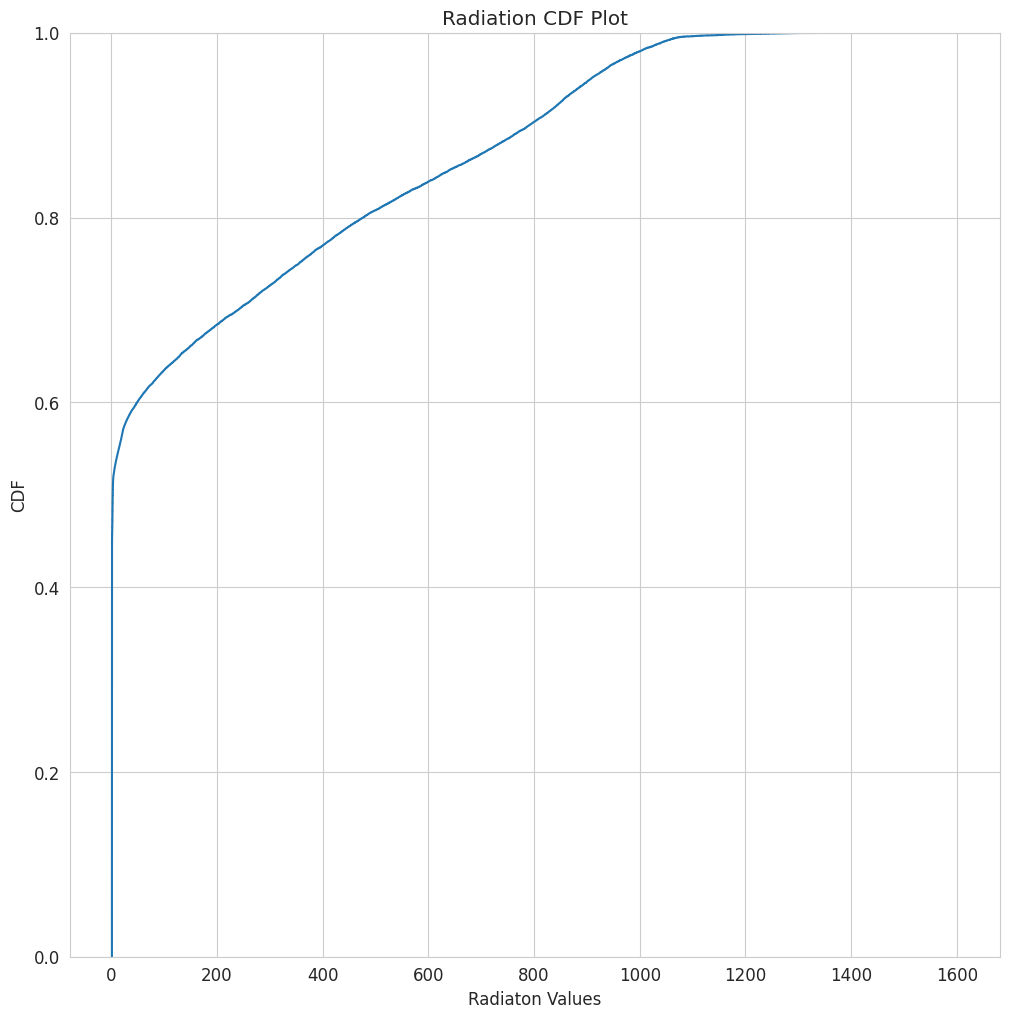

In [15]:
# Method 2: Using Seaborn
sns.ecdfplot(data=df, x='Radiation')
plt.xlabel('Radiaton Values')
plt.ylabel('CDF')
plt.title('Radiation CDF Plot')
plt.grid(True)
plt.show()